In [3]:
import imageio
import cv2
import subprocess
import librosa
import librosa.display
import soundfile as sf
import os
import torch
from torchvision import transforms
from inference.Inferencer import Inferencer
from models.PasticheModel import PasticheModel
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from PIL import Image
from pathlib import Path
import tqdm.notebook as tq
import h5py

In [4]:
# setup style transfer model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_styles = 16
image_size = 512
model_save_dir = "model/pastichemodel-FINAL.pth"
model_save_dir = "model/pastichemodel_style1_2-FINAL.pth"
pastichemodel = PasticheModel(num_styles)
inference = Inferencer(pastichemodel,device,image_size)
inference.load_model_weights(model_save_dir)  

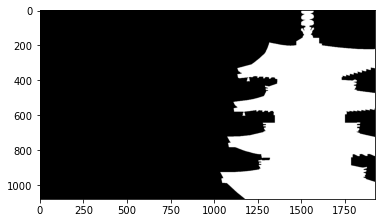

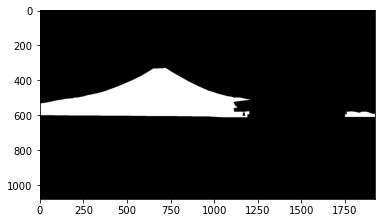

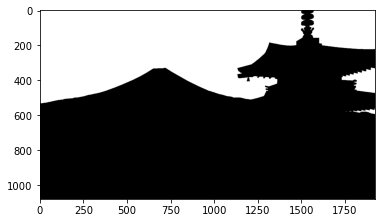

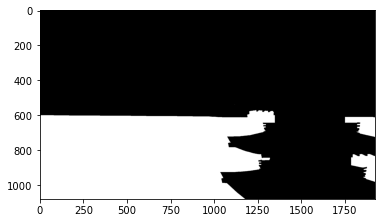

In [5]:
# image paths
im_fold = r'C:\deep_style_beats\images\pagoda\\'
ref_im_path = im_fold+'pagoda.jpg'
mask_paths = [im_fold+'pagoda.png',
              im_fold+'mountain.png',
              im_fold+'sky.png',
              im_fold+'ground.png']


#load images and setup masks (masks setup is very ugly but oh well)
ref_im = Image.open(ref_im_path).convert('RGB')
#test_im = get_transformation(ref_im, 0.3, strength=0.6)
masks = []
for mp in mask_paths:
    masks.append(cv2.resize(np.where(imageio.imread(mp)[:,:,:3]>0,1,0), dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST))
#masks.append(np.where(masks[0]==1, 1,0))

# for m in masks[1:-1]:
#     masks[-1] += m
# masks[-1] = np.where(masks[-1]==0, 1, 0)
for m in masks:
    plt.imshow(m*255, cmap=plt.cm.gray)
    plt.show()

In [ ]:
#prep images
def prep_transformations(im, ims_per_style, strength=1):
    transformed_images = []
    tmp_path = r'tmp_images\\'
    shape = np.array(ref_im).shape
    ref = np.array(ref_im)
    ref = cv2.resize(ref, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
    for i in tq.trange(num_styles):
        for j in tq.trange(ims_per_style, leave=False, position=0):
            fname = 't_style_%d_blend_%d_str_%d.png'%(i, j, strength*100)
            style_2 = i + 1 if i < 15 else 0
            tmp = inference.eval_image(im, i, style_2, 1-(j/ims_per_style))
            tmp = np.array(tmp)
            tmp = cv2.resize(tmp, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
            transformed_images.append(np.array(strength * tmp + (1-strength) * ref, dtype='uint8'))
            #tmp = np.array(strength * tmp + (1-strength) * ref, dtype='uint8')
            #imageio.imsave(tmp_path+fname, tmp)
                           
    return transformed_images